In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1 - dyfuzja $N_{max}$ czastek w ukladzie otwartym (proces Wienera)

In [2]:
D = 1
N_max = int(10**4) # 10**3, 10**4, 10**5
dt = 0.1
t_max = 100
sigma_dt = np.sqrt(2*D*dt)

x = np.zeros(N_max)
y = np.zeros(N_max)

def SimStep():
    for i in range(N_max):
        vals = np.random.normal(0, sigma_dt, (2))
        x[i] += vals[0]
        y[i] += vals[1]

def D_xx(_t):
    return (np.mean(x**2) - np.mean(x)**2 ) / (2*_t)

def D_yy(_t):
    return (np.mean(y**2) - np.mean(y)**2 ) / (2*_t)

def D_xy(_t):
    return (np.mean(np.multiply(x, y)) - np.mean(x)*np.mean(y)) / (2*_t)

n_t_max = int(t_max / dt)

D_xx_arr = np.zeros(n_t_max-1)
D_yy_arr = np.zeros(n_t_max-1)
D_xy_arr = np.zeros(n_t_max-1)

xx = []
yy = []

for i in range(1, n_t_max):
    SimStep()
    t = i*dt
    if (t in [0.1, 1.0, 5.0]):
        xx.append(x.copy())
        yy.append(y.copy())
    D_xx_arr[i-1] = D_xx(t)
    D_xy_arr[i-1] = D_xy(t)
    D_yy_arr[i-1] = D_yy(t)

N_t = n_t_max

D_xx_avg = np.mean(D_xx_arr)
D_xy_avg = np.mean(D_xy_arr)
D_yy_avg = np.mean(D_yy_arr)
D2_xx_avg = np.mean(D_xx_arr**2)
D2_xy_avg = np.mean(D_xy_arr**2)
D2_yy_avg = np.mean(D_yy_arr**2)
sigma_D_xx = np.sqrt((D2_xx_avg - D_xx_avg**2) / N_t)
sigma_D_xy = np.sqrt((D2_xy_avg - D_xy_avg**2) / N_t)
sigma_D_yy = np.sqrt((D2_yy_avg - D_yy_avg**2) / N_t)

D_xx_avg = 0.99392, sigma_D_xx = 0.00026
D_xy_avg = 0.00318, sigma_D_xy = 0.00025
D_yy_avg = 1.00815, sigma_D_yy = 0.00038


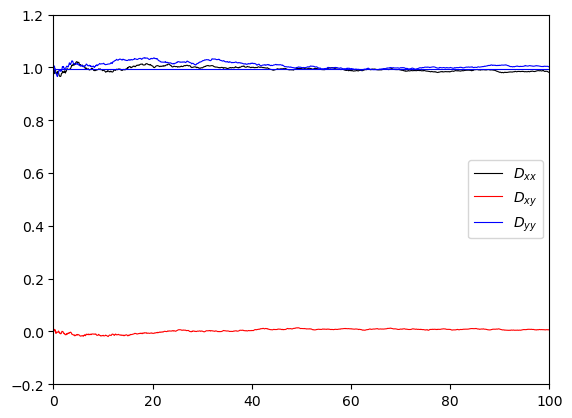

In [3]:
print(f'D_xx_avg = {D_xx_avg:.5f}, sigma_D_xx = {sigma_D_xx:.5f}')
print(f'D_xy_avg = {D_xy_avg:.5f}, sigma_D_xy = {sigma_D_xy:.5f}')
print(f'D_yy_avg = {D_yy_avg:.5f}, sigma_D_yy = {sigma_D_yy:.5f}')

plt.figure(dpi=100)
plt.plot(np.linspace(0, t_max, n_t_max-1), D_xx_arr, color='k', label='$D_{xx}$', linewidth=0.8)

plt.plot(np.linspace(0, t_max, n_t_max-1), D_xy_arr, color='r', label='$D_{xy}$', linewidth=0.8)

plt.plot(np.linspace(0, t_max, n_t_max-1), D_yy_arr, color='b', label='$D_{yy}$', linewidth=0.8)
plt.plot([0, 100], [D_xx_avg, D_xx_avg], color='b', linewidth=0.8)
plt.xlim(0, 100)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

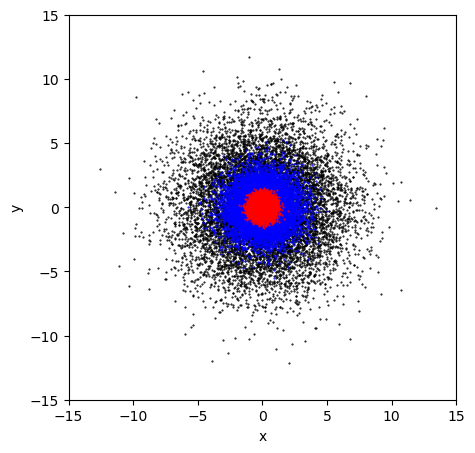

In [4]:
plt.figure(dpi=100, figsize=(5,5))
plt.scatter(xx[2], yy[2], color='k', s=0.25, edgecolors=None, linewidths=None)
plt.scatter(xx[1], yy[1], color='b', s=0.25)
plt.scatter(xx[0], yy[0], color='r', s=0.25)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-15, 15))
plt.ylim((-15, 15))
plt.show()

# Zadanie 2 - dyfuzja i absorpcja w ukladzie zamknietym o geometrii kolowej

In [62]:
D = 1
N_max = int(10**3)
dt = 0.1
t_max = 10**3
N = int(t_max/dt)
dn = 1
omega = dn / dt

x_r = 0
y_r = 0
R_r = 5

x_a = 3
y_a = 0
R_a = 0.1

x_s = -4.5
y_s = 0

x = np.zeros(N_max)
y = np.zeros(N_max)
theta = np.zeros(N_max)

for it in range(1, N):
    t = it*dt
    n = 0
    n_new = 0
    for i in range(0, N_max):
        if theta[i] == 0 and n_new < dn:
            theta[i] = 1
            x[i] = x_s
            y[i] = y_s
            n_new += 1
        if theta[i] == 1:
            

In [63]:
def vector_rotation(tx, ty, tz, x, y, z, teta):
	p0 = p1 = p2 = p3 = 0.0
	q0 = q1 = q2 = q3 = 0.0
	r0 = r1 = r2 = r3 = 0.0

	t=np.sqrt(tx*tx+ty*ty+tz*tz)
	cs=np.cos(teta/2)
	sn=np.sin(teta/2)
	# kwaternion obrotu
	p0=cs
	p1=tx/t*sn
	p2=ty/t*sn
	p3=tz/t*sn
	# kwaternion obracanego wektora
	r0=0.
	r1=x
	r2=y
	r3=z
	# q=r_1*p^{*}
	q0=r0*p0-r1*(-p1)-r2*(-p2)-r3*(-p3)
	q1=r1*p0+r0*(-p1)-r3*(-p2)+r2*(-p3)
	q2=r2*p0+r3*(-p1)+r0*(-p2)-r1*(-p3)
	q3=r3*p0-r2*(-p1)+r1*(-p2)+r0*(-p3)

	# r_2=p*q
	r0=p0*q0-p1*q1-p2*q2-p3*q3
	r1=p1*q0+p0*q1-p3*q2+p2*q3
	r2=p2*q0+p3*q1+p0*q2-p1*q3
	r3=p3*q0-p2*q1+p1*q2+p0*q3

	# zwracamy wspolrzedne wektora obroconego
	x=r1
	y=r2
	z=r3

	return (x, y, z)

3
